# Assignment

#1) Prepare a classification model using Naive Bayes 
for salary data

In [1]:
!pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
Data_train = pd.read_csv('SalaryData_Train.csv')
Data_test = pd.read_csv('SalaryData_Test.csv')

In [4]:
#Analsyis for Training Data Set
print(Data_train.shape)
Data_train.head()

(30161, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
Data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
Data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
Data_train[Data_train.duplicated()].shape

(3258, 14)

In [9]:
Data_train.drop_duplicates(ignore_index=True,inplace=True)
Data_train[Data_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [10]:
Data_train[Data_train.duplicated()].shape

(0, 14)

In [11]:
#Analysis for test data
print(Data_test.shape)
Data_test.head()

(15060, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
Data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [14]:
Data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
Data_test[Data_test.duplicated()].shape

(930, 14)

In [16]:
Data_test.drop_duplicates(ignore_index=True,inplace=True)
Data_test[Data_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [17]:
#Categorical features
categorical_feat = [fe for fe in Data_train.columns if Data_train[fe].dtype=='O']
categorical_feat

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [18]:
#Categories in categorical feature and their frequency
for fe in categorical_feat:
    print(Data_train[fe].value_counts())
    print("***********************")

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
***********************
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
***********************
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
***********************
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical  

In [19]:
#Count of Categories in a Categorical features
for fe in categorical_feat:
    print(fe,":",len(Data_train[fe].value_counts()))

workclass : 7
education : 16
maritalstatus : 7
occupation : 14
relationship : 6
race : 5
sex : 2
native : 40
Salary : 2


<AxesSubplot: xlabel='count', ylabel='workclass'>

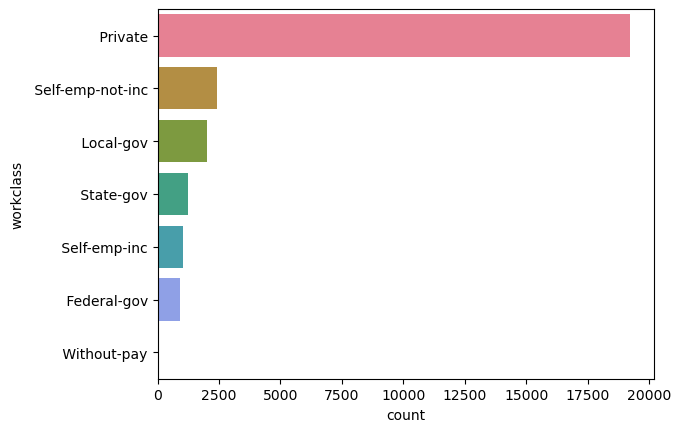

In [20]:
sns.countplot(y="workclass", data=Data_train,order=Data_train['workclass'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='education'>

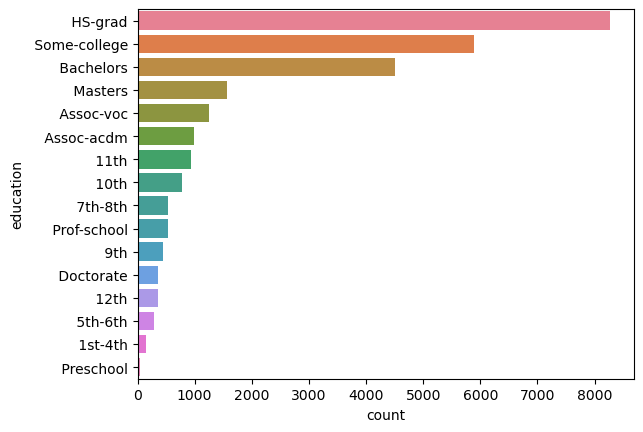

In [21]:
sns.countplot(y="education", data=Data_train,order=Data_train['education'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='maritalstatus'>

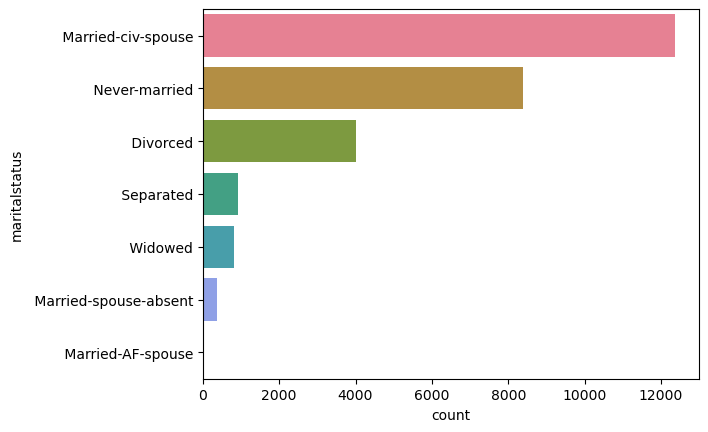

In [22]:
sns.countplot(y="maritalstatus", data=Data_train,order=Data_train['maritalstatus'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='occupation'>

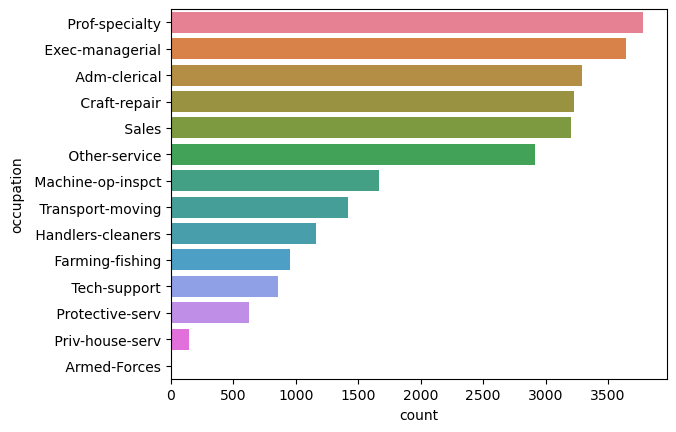

In [23]:
sns.countplot(y="occupation", data=Data_train,order=Data_train['occupation'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='relationship'>

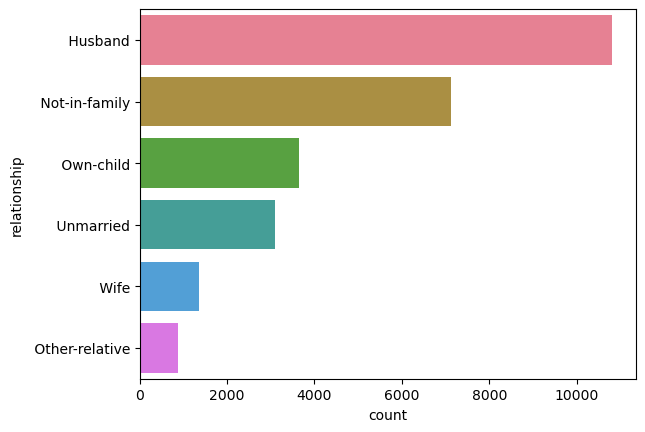

In [24]:
sns.countplot(y="relationship", data=Data_train,order=Data_train['relationship'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='race'>

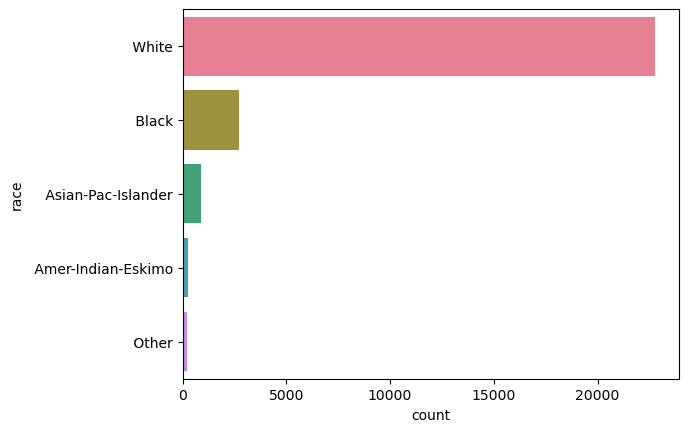

In [25]:
sns.countplot(y="race", data=Data_train,order=Data_train['race'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='sex'>

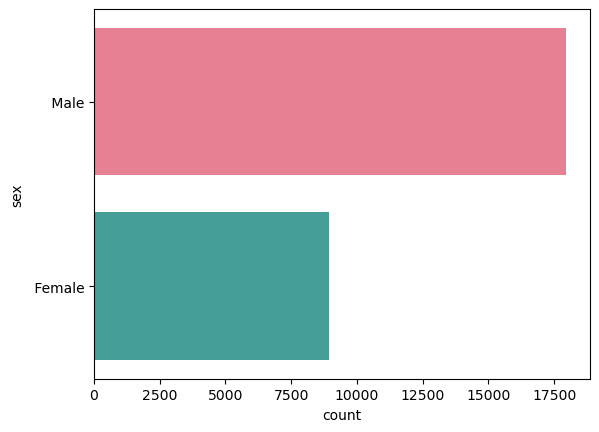

In [26]:
sns.countplot(y="sex", data=Data_train,order=Data_train['sex'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='native'>

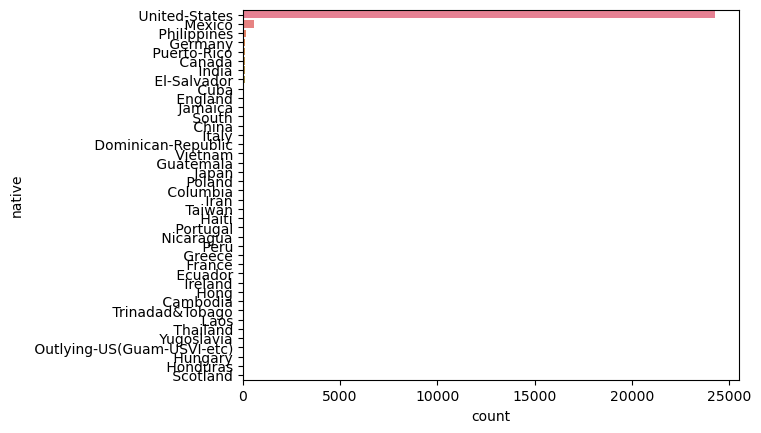

In [27]:
sns.countplot(y="native", data=Data_train,order=Data_train['native'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='Salary'>

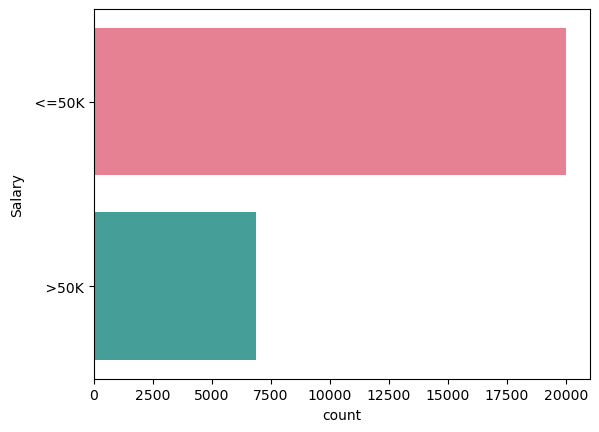

In [28]:
sns.countplot(y="Salary", data=Data_train,order=Data_train['Salary'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='Salary', ylabel='count'>

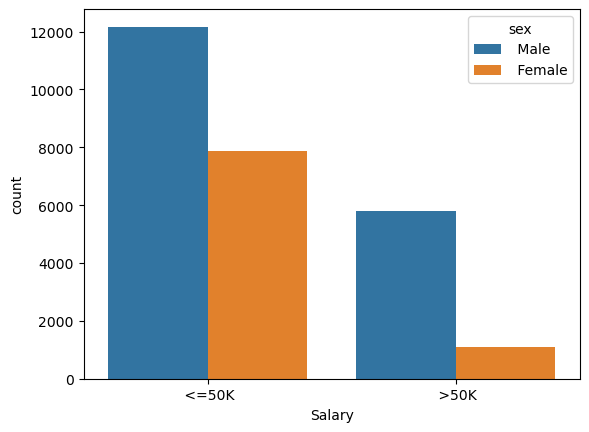

In [29]:
#Analysis of other features with Salary Feature
sns.countplot(x='Salary', hue='sex', data=Data_train)

<AxesSubplot: xlabel='Salary', ylabel='count'>

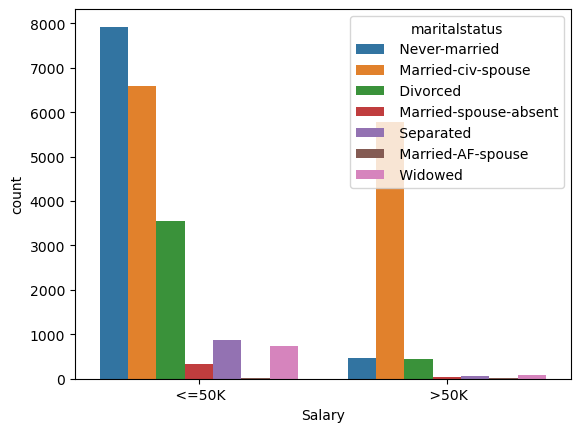

In [30]:
sns.countplot(x='Salary', hue='maritalstatus', data=Data_train)

<AxesSubplot: xlabel='Salary', ylabel='count'>

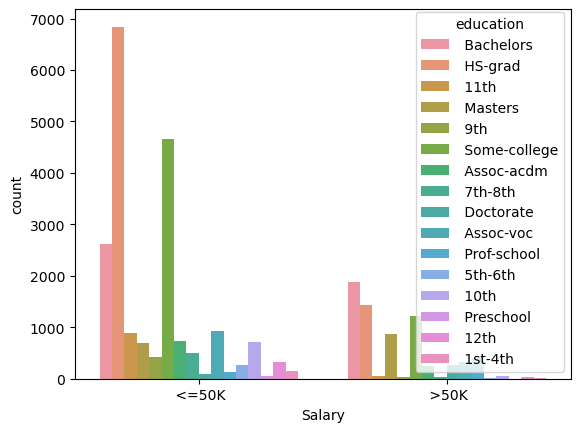

In [31]:
sns.countplot(x='Salary', hue='education', data=Data_train)

In [32]:
numerical_fet = [fe for fe in Data_train.columns if Data_train[fe].dtype!='O']
numerical_fet

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [33]:
Data_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


<AxesSubplot: >

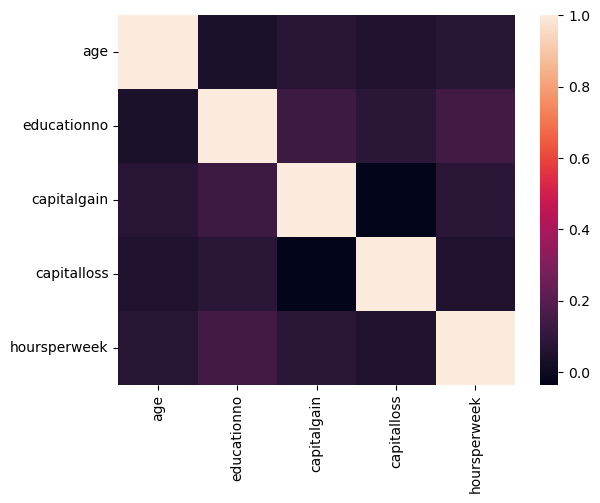

In [34]:
sns.heatmap(Data_train.corr())

In [35]:
Data_test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [36]:
Data_train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [37]:
import category_encoders as ce

In [38]:
encoder = ce.OneHotEncoder(cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
Data_train_en = encoder.fit_transform(Data_train)
Data_test_en = encoder.fit_transform(Data_test)

In [39]:
Data_train_en.tail(3)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,Salary
26900,27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
26901,58,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<=50K
26902,52,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,>50K


In [40]:
Data_test_en.tail(3)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40,Salary
14127,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
14128,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
14129,35,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,>50K


In [41]:
Data_train_en_x = Data_train_en.drop('Salary',axis=1)
Data_test_en_x = Data_test_en.drop("Salary",axis=1)

In [42]:
Data_train_en_x.tail(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
26901,58,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26902,52,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Data_test_en_x.tail(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14128,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14129,35,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
le = LabelEncoder()
Data_train_en_y = pd.DataFrame(le.fit_transform(Data_train_en['Salary']))
Data_train_en_y.tail(2)

,0
26901,0
26902,1


In [45]:
Data_test_en_x.tail(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14128,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14129,35,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Data_test_en_y = pd.DataFrame(le.fit_transform(Data_test_en['Salary']))
Data_test_en_y.tail(2)

,0
14128,0
14129,1


In [47]:
cols = Data_train_en_x.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'education_1',
       'education_2',
       ...
       'native_31', 'native_32', 'native_33', 'native_34', 'native_35',
       'native_36', 'native_37', 'native_38', 'native_39', 'native_40'],
      dtype='object', length=102)

In [48]:
Scaler = MinMaxScaler()
Data_train_en_x_std = pd.DataFrame(Scaler.fit_transform(Data_train_en_x),columns=cols)
Data_test_en_x_std = pd.DataFrame(Scaler.fit_transform(Data_test_en_x),columns=cols)

In [49]:
Data_train_en_x_std.tail(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
26901,0.561644,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26902,0.479452,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
Data_test_en_x_std.tail(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14128,0.369863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14129,0.246575,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#Model Traing
from sklearn.naive_bayes import CategoricalNB as cnb,GaussianNB as gnb,MultinomialNB as mnb

In [52]:
cnb_model = cnb()
cnb_model.fit(Data_train_en_x_std,Data_train_en_y)

CategoricalNB()

In [53]:
#Predicting the results
cnb_pred = cnb_model.predict(Data_test_en_x_std)
cnb_pred

array([0, 1, 0, ..., 0, 0, 1])

In [54]:
#Confusion Matrix
confusion_matrix(Data_test_en_y,cnb_pred)

array([[8134, 2486],
       [1642, 1868]])

In [55]:
cnb_pred_prob = cnb_model.predict_proba(Data_test_en_x_std)
cnb_pred_prob

array([[9.88996101e-01, 1.10038985e-02],
       [1.12385582e-01, 8.87614418e-01],
       [8.28923967e-01, 1.71076033e-01],
       ...,
       [8.93033177e-01, 1.06966823e-01],
       [9.99535349e-01, 4.64651292e-04],
       [4.24518301e-01, 5.75481699e-01]])

In [56]:
y_prob = pd.DataFrame(cnb_pred_prob,columns=['<=50k','>=50k'])
y_prob["cnb_pred"] = cnb_pred
y_prob

,<=50k,>=50k,cnb_pred
0,0.988996,0.011004,0
1,0.112386,0.887614,1
2,0.828924,0.171076,0
3,0.023479,0.976521,1
4,0.989698,0.010302,0
...,...,...,...
14125,0.999949,0.000051,0
14126,0.999913,0.000087,0
14127,0.893033,0.106967,0
14128,0.999535,0.000465,0


In [57]:
#Check for accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(Data_test_en_y,cnb_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     10620
           1       0.43      0.53      0.48      3510

    accuracy                           0.71     14130
   macro avg       0.63      0.65      0.64     14130
weighted avg       0.73      0.71      0.72     14130



In [58]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc_score = roc_auc_score(Data_test_en_y,cnb_pred)
logit_roc_auc_score

0.6490535515959245

Text(0.5, 1.0, 'Auc Curve')

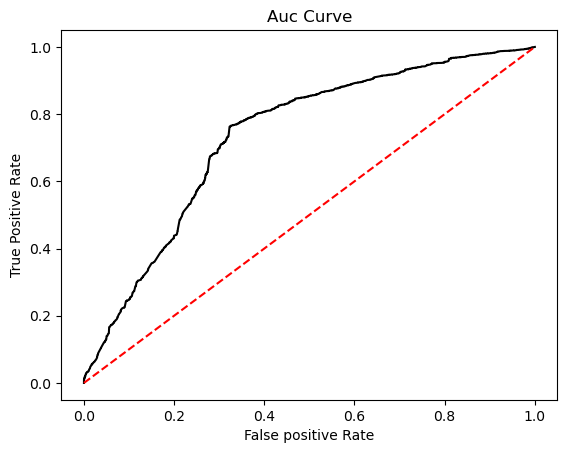

In [59]:
fpr, tpr, thresholds = roc_curve(Data_test_en_y,cnb_model.predict_proba(Data_test_en_x_std)[:,1])
plt.plot(fpr,tpr,color='black')
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Auc Curve")

In [60]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(cnb_model.predict_proba(Data_test_en_x_std)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Data_test_en_y,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)

accuracy_ls.columns = ["thresholds","accuracy"]
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,thresholds,accuracy
51,9.878315e-01,0.755060
52,9.877524e-01,0.754989
49,9.881529e-01,0.754989
48,9.891209e-01,0.754989
46,9.892685e-01,0.754989
...,...,...
3043,1.146424e-06,0.249328
3044,1.066830e-06,0.249257
3045,9.710401e-07,0.249257
3046,9.382760e-07,0.249186


In [61]:
accuracy_ls[accuracy_ls['accuracy']==accuracy_ls['accuracy'].max()]

,thresholds,accuracy
51,0.987831,0.75506


In [62]:
threshold = 0.987831
preds = np.where(cnb_model.predict_proba(Data_test_en_x_std)[:,1]>threshold,1,0)
print(classification_report(Data_test_en_y,preds))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     10620
           1       0.66      0.03      0.05      3510

    accuracy                           0.75     14130
   macro avg       0.71      0.51      0.46     14130
weighted avg       0.73      0.75      0.66     14130



In [63]:
gnb_model = gnb()
gnb_model.fit(Data_train_en_x_std,Data_train_en_y)

GaussianNB()

In [64]:
#Predicting the results
gnb_pred = gnb_model.predict(Data_test_en_x_std)
gnb_pred

array([1, 1, 0, ..., 0, 0, 0])

In [65]:
confusion_matrix(Data_test_en_y,gnb_pred)

array([[5081, 5539],
       [1348, 2162]])

In [66]:
gnb_pred_prob = gnb_model.predict_proba(Data_test_en_x_std)
gnb_pred_prob

array([[1.71195535e-12, 1.00000000e+00],
       [2.51753930e-18, 1.00000000e+00],
       [1.00000000e+00, 9.45933326e-20],
       ...,
       [1.00000000e+00, 1.88990099e-27],
       [1.00000000e+00, 5.00516153e-82],
       [1.00000000e+00, 3.75142939e-19]])

In [67]:
y_prob_gnb = pd.DataFrame(gnb_pred_prob,columns=['<=50k','>=50k'])
y_prob_gnb["gnb"] = gnb_pred
y_prob_gnb

,<=50k,>=50k,gnb
0,1.711955e-12,1.000000e+00,1
1,2.517539e-18,1.000000e+00,1
2,1.000000e+00,9.459333e-20,0
3,4.321655e-36,1.000000e+00,1
4,1.000000e+00,1.154792e-34,0
...,...,...,...
14125,1.000000e+00,3.091132e-34,0
14126,1.000000e+00,1.447674e-45,0
14127,1.000000e+00,1.889901e-27,0
14128,1.000000e+00,5.005162e-82,0


In [68]:
#Check for accuracy
print(classification_report(Data_test_en_y,gnb_pred))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60     10620
           1       0.28      0.62      0.39      3510

    accuracy                           0.51     14130
   macro avg       0.54      0.55      0.49     14130
weighted avg       0.66      0.51      0.54     14130



In [69]:
mnb_model = mnb()
mnb_model.fit(Data_train_en_x_std,Data_train_en_y)

MultinomialNB()

In [70]:
#Predicting the results
mnb_pred = mnb_model.predict(Data_test_en_x_std)
mnb_pred

array([0, 1, 0, ..., 0, 0, 0])

In [71]:
confusion_matrix(Data_test_en_y,mnb_pred)

array([[8778, 1842],
       [2173, 1337]])

In [72]:
mnb_pred_prob = mnb_model.predict_proba(Data_test_en_x_std)
mnb_pred_prob

array([[0.96863473, 0.03136527],
       [0.30253452, 0.69746548],
       [0.93972657, 0.06027343],
       ...,
       [0.95895692, 0.04104308],
       [0.99746594, 0.00253406],
       [0.70858205, 0.29141795]])

In [73]:
y_prob_mnb = pd.DataFrame(gnb_pred_prob,columns=['<=50k','>=50k'])
y_prob_mnb["mnb"] = mnb_pred
y_prob_mnb

,<=50k,>=50k,mnb
0,1.711955e-12,1.000000e+00,0
1,2.517539e-18,1.000000e+00,1
2,1.000000e+00,9.459333e-20,0
3,4.321655e-36,1.000000e+00,1
4,1.000000e+00,1.154792e-34,0
...,...,...,...
14125,1.000000e+00,3.091132e-34,0
14126,1.000000e+00,1.447674e-45,0
14127,1.000000e+00,1.889901e-27,0
14128,1.000000e+00,5.005162e-82,0


In [74]:
#Check for accuracy
print(classification_report(Data_test_en_y,mnb_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     10620
           1       0.42      0.38      0.40      3510

    accuracy                           0.72     14130
   macro avg       0.61      0.60      0.61     14130
weighted avg       0.71      0.72      0.71     14130



In [75]:
Pred_df = pd.DataFrame(Data_test_en['Salary'])
Pred_df['mnb_pred'] = mnb_pred
Pred_df['cnb_pred'] = cnb_pred
Pred_df['gnb_pred'] = gnb_pred
Pred_df

,Salary,mnb_pred,cnb_pred,gnb_pred
0,<=50K,0,0,1
1,<=50K,1,1,1
2,>50K,0,0,0
3,>50K,1,1,1
4,<=50K,0,0,0
...,...,...,...,...
14125,<=50K,0,0,0
14126,<=50K,0,0,0
14127,<=50K,0,0,0
14128,<=50K,0,0,0
